In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('concrete_data.csv')

In [3]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [4]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
y_train = sc_y.fit_transform(y_train)


In [23]:
from sklearn.neighbors import KNeighborsRegressor
error_rate = []
# Will take some time
for i in range(1,10):
 
 knn = KNeighborsRegressor(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = sc_y.inverse_transform(knn.predict(X_test))
 
 from sklearn.metrics import mean_squared_error
 a = mean_squared_error(y_test, pred_i)
 print('For k = ',i," ",a)
 error_rate.append(a)

For k =  1   82.25693009708739
For k =  2   79.19389016990293
For k =  3   74.1331190399137
For k =  4   76.52052733616505
For k =  5   75.3866599223301
For k =  6   79.14411341693634
For k =  7   82.09437177531206
For k =  8   84.58320216171118
For k =  9   85.57036884214313


Text(0, 0.5, 'Error Rate')

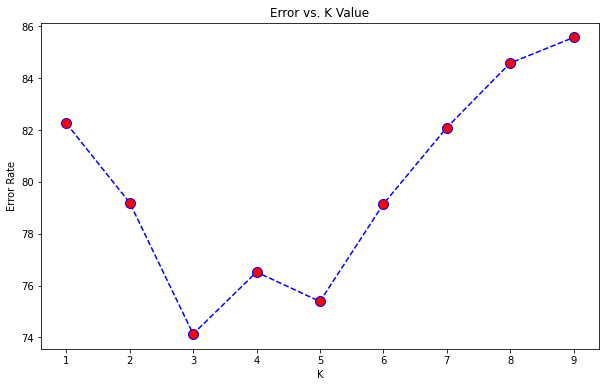

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [15]:
regressor = KNeighborsRegressor(n_neighbors = 3)
regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [16]:
y_pred = sc_y.inverse_transform(regressor.predict(X_test))

In [17]:
a = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.718531325048275

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

74.1331190399137